# Doc2Vec Clustering Notebook Prototype
### Author: Andrew Auyeung  

This notebook is the prototype used when determining what clustering algorithm should be used. 

References: [Detecting Document Similarity with doc2vec](https://towardsdatascience.com/detecting-document-similarity-with-doc2vec-f8289a9a7db7)

Versions:  
doc2vec_v1 - FSM.  
doc2vec_v2 - retrained with doctags as an entire element. 
doc2vec_v3 - remove "TDS Editors" from authors.  Their articles were mainly links to other articles and did not have any text to their body.   
doc2vec_v4 - Retrained with some text cleaning.  Some words are concatenated when the punctuation is removed. 
doc2vec_v5 - Decreased vector size to 100.  Lowered Epochs to 40.

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec

In [119]:
# Load Model
model = Doc2Vec.load('../models/d2v_v5.model')

In [90]:
# Load articles
articles = pd.read_csv('../src/TDS_articles.csv', sep='\t', index_col=0)

In [4]:
articles[articles.author=='Noah Jaffe']

title subtitle  \
article_id                                                               
52057       Using subway data to place volunteers — and di...      NaN   

                author        date  claps  images  codeblocks  \
article_id                                                      
52057       Noah Jaffe  2020-10-01   22.0       8          15   

                                                         link  \
article_id                                                      
52057       https://towardsdatascience.com/using-mta-turns...   

                                                         body  
article_id                                                     
52057       {"I recently began a Metis data science bootca...

In [5]:
similar_articles = model.docvecs.most_similar('52057')
print("Article ID:\tTitle:")
for j in range(10):
    current_id = int(similar_articles[j][0])
    print(f"{current_id}\t\t{articles.loc[current_id]['title']}")

Article ID:	Title:
45901		MTA Turnstile Data: Exploratory Data Analysis
60101		METIS INTRODUCTION
42498		MTA Turnstile Traffic Analysis to Optimize Street Engagements
60108		Investigating StreetEasy’s “NYC Neigborhoods to Watch in 2018”
43390		How did Lockdown impact our daily movement?
48506		Week 1 @ Metis Singapore Data Science Bootcamp — Project 1: Exploratory Data Analysis (EDA) on the NYC MTA, Turnstiles and Drinking out of the Proverbial Fire Hose
51762		How our hackathon project inspired Google to fight the opioid crisis
64286		Powerlifting Data and Exploratory Data Analysis Part 1
30690		COVID-19 Data Visualization: Tracking Movement and Demographic Trends
50409		Reflecting on 6 Months of Leveraging Tech & Data in Theater


Lets check that the word2vec model works.  

In [120]:
model.most_similar("integrity".split())

[('consistency', 0.6184630990028381),
 ('reliability', 0.5796350240707397),
 ('privacy', 0.5626894235610962),
 ('authenticity', 0.5559022426605225),
 ('confidentiality', 0.5536571145057678),
 ('uniqueness', 0.5335603952407837),
 ('provenance', 0.5306360721588135),
 ('security', 0.5162038803100586),
 ('traceability', 0.4978524446487427),
 ('correctness', 0.48269838094711304)]

In [121]:
model.most_similar("pyspark")

[('spark', 0.7352305054664612),
 ('dask', 0.659734845161438),
 ('python', 0.6578723192214966),
 ('pandas', 0.6186102628707886),
 ('scala', 0.6069382429122925),
 ('pyhive', 0.5837025046348572),
 ('tensorflow', 0.5764666795730591),
 ('tkinter', 0.5759386420249939),
 ('impyute', 0.5702909827232361),
 ('streamlit', 0.5687650442123413)]

In [122]:
model.most_similar("knn")

[('xgboost', 0.6666017174720764),
 ('svm', 0.6450763940811157),
 ('dbscan', 0.6353409290313721),
 ('decisiontree', 0.5695279836654663),
 ('kmeans', 0.5687319040298462),
 ('adaboost', 0.5685536861419678),
 ('clustering', 0.5631896257400513),
 ('ridgeregression', 0.555263876914978),
 ('lda', 0.548650324344635),
 ('rf', 0.5467294454574585)]

In [123]:
model.most_similar("random")

[('radom', 0.6581887006759644),
 ('gump', 0.6280225515365601),
 ('randomly', 0.5573165416717529),
 ('isolations', 0.5471309423446655),
 ('okanogan', 0.5412631034851074),
 ('sealake', 0.5391701459884644),
 ('peatland', 0.5139349699020386),
 ('wenatchee', 0.5044668316841125),
 ('amazonian', 0.49708014726638794),
 ('excelsior', 0.49603521823883057)]

From a first glance, this looks okay.  
* Integrity gives other nouns that describe the constitution of something. 
* pyspark is similar to other python libraries with closest similarities to its siblings (Spark and Scala)
* king gives different similarities to other terms.  Seems like those esimilar terms are uplifting.  It makes sense that Queen may not show up because this corpus may not even contain that term. 

We can test using the famous King - Man = Queen example. 

We don't get exact matches for the traditional King and Queen but it is to be expected with a small corpus.  
*However*, if we try combinations with data science context, we get better results!

In [124]:
model.similar_by_vector(model['king'] - model['man'])

[('king', 0.4975564479827881),
 ('modernisation', 0.39232197403907776),
 ('cna', 0.3614612817764282),
 ('hotz', 0.3542608916759491),
 ('whitehouse', 0.3522770404815674),
 ('contractions', 0.3405855894088745),
 ('ramification', 0.3398260474205017),
 ('enablement', 0.3393646478652954),
 ('corroborating', 0.33443111181259155),
 ('birthdates', 0.3326979875564575)]

In [125]:
model.similar_by_vector(model['python'] + model['image'])

[('image', 0.7670102119445801),
 ('python', 0.6140998601913452),
 ('images', 0.5330037474632263),
 ('imagemagick', 0.5228685140609741),
 ('airsim', 0.521468460559845),
 ('opencv', 0.5147432088851929),
 ('language', 0.5035250782966614),
 ('text', 0.5005525350570679),
 ('bosh', 0.4979936182498932),
 ('pydicom', 0.4923616051673889)]

In [126]:
model.similar_by_vector(model['word'] + model['sentiment'])

[('sentiment', 0.8209339380264282),
 ('word', 0.7987803220748901),
 ('sentence', 0.6688302755355835),
 ('tweet', 0.6199710369110107),
 ('bigram', 0.6193698644638062),
 ('emotion', 0.6062657833099365),
 ('polarity', 0.5730971097946167),
 ('phrase', 0.5543917417526245),
 ('tweets', 0.5541808009147644),
 ('language', 0.5538697838783264)]

### To Do:
* Go back and chck for typos in raw text.  Some words are concatenated that may not be intentional. 

## Doc2Vec Document Similarity

*document vectors are stored in the model by index.  To look up by the document you will have to find the index associated with the article_id tag*

In [78]:
# Let's look at the first document in the model
id_1 = int(model.docvecs.index_to_doctag(0))
id_1

3406

In [79]:
articles.loc[id_1]['title']

'Iteratively Finding a Good Machine Learning Model'

In [117]:
def show_similar_titles(model, articles, idx, n_to_show=5):
    """
    Helper Function to look up similar articles from the corpus
    """
    check_id = int(model.docvecs.index_to_doctag(idx))
    print(f"The title of the article selected is: {articles.loc[check_id]['title']}")
    print(f"It's article id is: {check_id}\n")

    print(f"The {n_to_show} most similar articles are:")
    similar_articles = model.docvecs.most_similar(positive=[idx], topn=n_to_show)
    print("Article ID:\tTitle:")
    for j in range(n_to_show):
        current_id = int(similar_articles[j][0])
        print(f"{current_id}\t\t{articles.loc[current_id]['title']}\t\t{similar_articles[j][1]}")

In [127]:
show_similar_titles(model, articles, np.random.randint(len(articles)), 10)

The title of the article selected is: Dealing with Highly Dimensional Data using Principal Component Analysis (PCA)
It's article id is: 21903

The 10 most similar articles are:
Article ID:	Title:
34727		Dimensionality Reduction Approaches		0.7088656425476074
24602		Principal Component Analysis (PCA) with Scikit-learn		0.6818242073059082
61429		Tidying up with PCA: An Introduction to Principal Components Analysis		0.6795565485954285
44304		PCA (Principal Component Analysis) Explained Visually In 5 Minutes		0.6725121736526489
38115		Unmasking the math behind PCA		0.660883903503418
16700		A Complete Guide to Principal Component Analysis — PCA in Machine Learning		0.6587144732475281
62597		Principal Component Analysis- Intro		0.6507127285003662
47314		How exactly does PCA work?		0.6430128812789917
31968		Principal Component Analysis with NumPy		0.6411601901054382
45343		Theory of Principal Component Analysis (PCA) and implementation on Python		0.6367892026901245


In [128]:
show_similar_titles(model, articles, np.random.randint(len(articles)), 10)

The title of the article selected is: Testing Airflow jobs on Google Cloud Composer using pytest
It's article id is: 21730

The 10 most similar articles are:
Article ID:	Title:
17766		Going Serverless with OpenFaaS and Golang — The Ultimate Setup and Workflow		0.6478610038757324
53976		Getting Started with Airflow Using Docker		0.6461927890777588
47260		Using AWS DMS to tail MongoDB		0.6371434926986694
25336		Is Apache Airflow good enough for current data engineering needs?		0.6247619390487671
23348		Airflow — sharing data between tasks		0.6189370155334473
26044		An Apache Airflow MVP: Complete Guide for a Basic Production Installation Using LocalExecutor		0.616655707359314
44143		Troubleshooting OpenShift Clusters and Workloads		0.6165060997009277
46731		Scale Your Data Pipelines with Airflow and Kubernetes		0.6138454675674438
47704		Why Apache Airflow Is a Great Choice for Managing Data Pipelines		0.6133322715759277
36260		Running a Data Replication Pipeline on Kubernetes with Argo a

In [363]:
show_similar_titles(model, articles, 2000)

The title of the article selected is: Coreference Resolution in Python
It's article id is: 18957

The 5 most similar articles are:
Article ID:	Title:
54207		Large-scale Graph Mining with Spark: Part 2
58192		Text Similarity with TensorFlow.js Universal Sentence Encoder
46848		Natural Language Processing: A beginner’s guide part-II
16318		A Beginner’s Guide to Rasa NLU for Intent Classification and Named-entity Recognition
55230		A Practitioner's Guide to Natural Language Processing (Part I) — Processing & Understanding Text


In [97]:
show_similar_titles(model, articles, 33133)

The title of the article selected is: How to build low-cost, real-time and scalable machine learning models in 4 steps using Google Cloud
It's article id is: 39978

The 5 most similar articles are:
Article ID:	Title:
48932		LSTM for time series prediction
54413		How to train and predict regression and classification ML models using only SQL — using BigQuery ML
58965		Just another AI trying to predict the stock market: Part 2
30299		LSTM for Stock Price Prediction
18862		Publishing Keras Model API with TensorFlow Serving


In [96]:
show_similar_titles(model, articles, 25090)

The title of the article selected is: How I implemented iPhone X’s FaceID using Deep Learning in Python.
It's article id is: 57864

The 5 most similar articles are:
Article ID:	Title:
52519		Learning computer vision
36243		Face Unlock with 2D Data
56200		From brain waves to robot movements with deep learning: an introduction.
42231		Real Time 3D Face Tracking with Deep Learning
59637		Family fun with deepfakes. Or how I got my wife onto the Tonight Show


## Using Doc2Vec to document similarity to vector similarity
* Convert String to W2V
* Compare W2V to D2V

In [82]:
query_vector = model.infer_vector("Beginnner Projects for Data Science".split())

In [78]:
model.docvecs.index_to_doctag(16757)

'48436'

In [69]:
def similar_doc_by_query(query, n_to_show=5):
    assert type(query)==str
    query_vector = model.infer_vector(query.split()) 
    similar_articles = model.docvecs.most_similar([query_vector])
    for j in range(n_to_show):
        current_id = int(similar_articles[j][0])
        intro = articles.loc[current_id]['body'].replace('{','').split('","')[0]
        print(f"Article ID:\t{current_id}")
        print(f"Title: \t\t{articles.loc[current_id]['title']}")
        print(f"Intro: \t\t{intro}")

In [94]:
similar_doc_by_query("python image recognition", 10)

Article ID:	48436
Title: 		Cheat sheet for Python dataframe ↔ R dataframe syntax conversions
Intro: 		"In this guide, for Python, all the following commands are based on the ‘pandas’ package. For R, the ‘dplyr’ and ‘tidyr’ package are required for certain commands.
Article ID:	57175
Title: 		Python based Plotting with Matplotlib
Intro: 		"If you are an analyst using Python, chances are that your bread and butter consists of matplotlib, pandas, numpy and sklearn. In this blog, I will cover the basics of plotting using matplotlib. All the Jupyter Notebooks are available here:https://github.com/snazrul1/PyRevolution/tree/master/matplotlib"}
Article ID:	49138
Title: 		Feature selection using Wrapper methods in Python
Intro: 		"Dear Reader,
Article ID:	44659
Title: 		How to send Python App Crash Notifications automatically via Email
Intro: 		"This tiny code snippet can help you to achieve that.
Article ID:	56179
Title: 		What I learned from 7 month ML journey…
Intro: 		"This little post is 

In [11]:
model.total_train_time/3600

0.39311516593749973

## Topic Model with Doc2Vec
We will try clustering with PCA(2) and then DBSCAN to check for clusters.  
Steps:  
1. Need a conversion from the model's document index to its associated document tags  
2. PCA to visualize.   May need to rewrite the PCA Visualization plot to add in context of terms.  Maybe use titles of articles to do visual analysis?  
3. Use DBSCAN to search for clusters based on density.  Not sure about distance metric yet.   

In [211]:
model.docvecs.vectors_docs

array([[-0.2086484 ,  0.74766654, -0.13281198, ..., -4.418513  ,
         3.863445  , -1.003898  ],
       [ 0.6898131 ,  0.07900671,  0.6799487 , ..., -3.2480214 ,
         3.2630968 ,  0.27556705],
       [-2.7516708 ,  0.10931432,  0.22373906, ...,  0.50017786,
        -0.6704044 , -2.082502  ],
       ...,
       [ 3.4422028 ,  1.0311323 , -4.259427  , ..., -2.8754826 ,
        -0.26456988, -0.451631  ],
       [-2.4910774 ,  1.1628321 , -2.2151136 , ..., -0.9286146 ,
         0.50013655, -2.3644364 ],
       [ 0.21698952, -0.774499  , -2.809891  , ...,  0.57830733,
         0.59509945, -0.08918346]], dtype=float32)

In [99]:
model.docvecs.most_similar(3)

[('42953', 0.5175617933273315),
 ('51513', 0.4481806755065918),
 ('18496', 0.43002885580062866),
 ('25271', 0.4299669861793518),
 ('45332', 0.4287530779838562),
 ('53243', 0.426179438829422),
 ('58546', 0.4261002540588379),
 ('48437', 0.4159468412399292),
 ('52209', 0.41441047191619873),
 ('57409', 0.41289985179901123)]

## Writing Metadata and vectors out to CSV for visualization using [Tensor Flow Projector](http://projector.tensorflow.org/)

In [60]:
import csv
# Helper function to write by row to csv
def write_to_csv(doc, filepath, delimiter='\t'):
    with open(filepath, 'w') as to_write:
        writer = csv.writer(to_write, delimiter=delimiter)
        writer.writerows(doc)

In [61]:
# Write vectors to model
write_to_csv(model.docvecs.vectors_docs, '../src/docvecs.csv')

In [127]:
titles = []
for row in range(len(model.docvecs.vectors_docs)):
    article_id = int(model.docvecs.index_to_doctag(row))
    titles.append([articles.loc[int(article_id)]['title']])

In [128]:
write_to_csv(titles, '../src/docvecs_titles.csv')

## Clustering Document Vectors

In [15]:
train = model.docvecs.vectors_docs

In [11]:
from sklearn.decomposition import PCA, TruncatedSVD, LatentDirichletAllocation
from sklearn.cluster import DBSCAN
from collections import Counter
from vis_util import *

In [39]:
clustering = PCA(14, )
clustering.fit(train)
topic_results = clustering.transform(train)
topic_labels = np.argmax(topic_results, axis=1)
Counter(topic_labels)

Counter({4: 2519,
         1: 4841,
         0: 5411,
         10: 1215,
         5: 2376,
         11: 1030,
         2: 4926,
         7: 1879,
         6: 2639,
         3: 3291,
         13: 1446,
         8: 1547,
         12: 1041,
         9: 1462})

In [40]:
show_labeled_titles(topic_labels)


Topic 0:

Image segmentation in 2020
Deep Learning on multi-label text classification with FastAi
Panoptic Segmentation with UPSNet
Optimize NVIDIA GPU performance for efficient model inference
Reinforcement Learning — Generalisation in Continuous State Space
Introduction to kNN algorithm by experiment on Khmer Handwriting classification using Java 8
Stacking Classifiers for Higher Predictive Performance
Data Exploration with Adversarial Autoencoders
Understanding Neural Networks
How to get 4x speedup and better generalization using the right batch size

Topic 1:

The curse of knowledge
Facebook vs. EU Artificial Intelligence and Data Politics
Data-Science Recruitment — Why You May Be Doing It Wrong
Information Fiduciary Theory and the Market
AI: Almost Immortal
Explaining Data Science To Your Grandma
How I overcome Imposter Syndrome in Data Analytics
Question Answering for Enterprise Use Cases
5 Reasons Why Most Data Science Projects Fail To Get Adopted
Is Artificial Intelligence Rac

The average silhouette score is -0.0056559136137366295


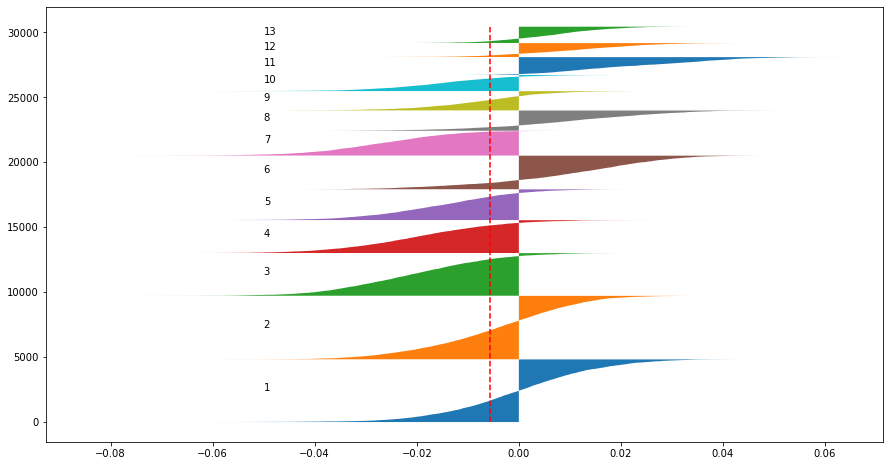

In [124]:
plot_silhouette(train[topic_labels!=0], topic_labels[topic_labels!=0])

In [261]:
vis_features = PCA(2).fit_transform(train)

In [140]:
model.vocabulary.

## Kmeans

In [318]:
from sklearn.cluster import KMeans

In [322]:
# inertias = []
for i in range(30, 50):
    km = KMeans(n_clusters=i, n_jobs=-1)
    km.fit(train)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Inertia')

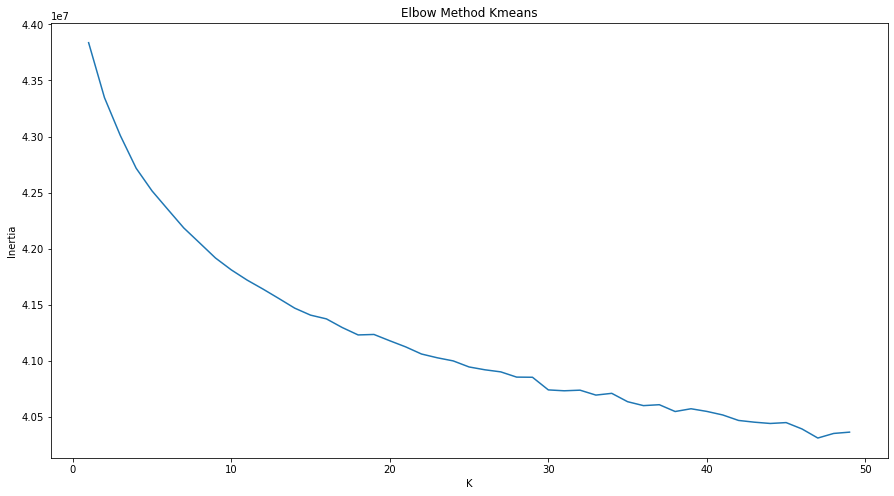

In [324]:
plt.figure(figsize=(15,8))

plt.plot(range(1,50), inertias)

# plt.vlines(x=5, ymax=max(inertias), ymin=0, linestyles='--')
plt.title('Elbow Method Kmeans')
plt.xlabel('K')
plt.ylabel('Inertia')

### Agglomerative Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
ac = AgglomerativeClustering(affinity='cosine')

In [19]:
topic_labels = ac.fit(train).labels_

In [24]:
topic_labels==1

array([False, False, False, ...,  True, False, False])

The average silhouette score is -0.01544842217117548


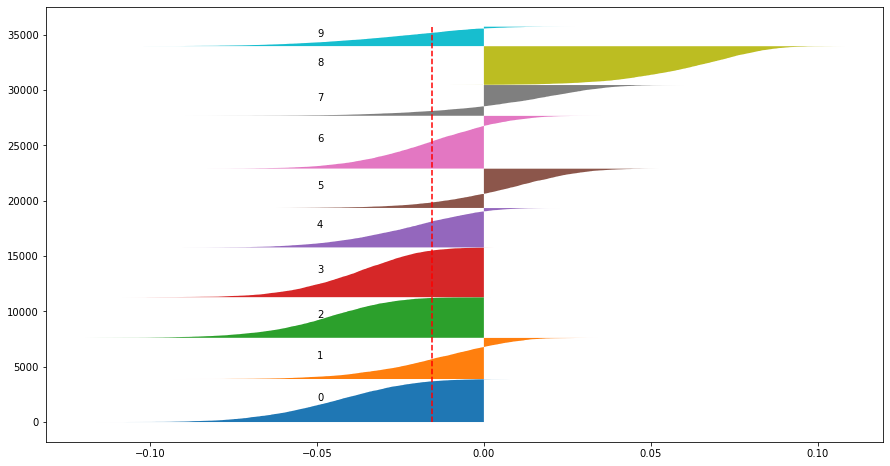

In [21]:
plot_silhouette(train, topic_labels)

In [26]:
model.docvecs.

array([], shape=(0, 300), dtype=float32)

In [31]:
np.array(titles_)[topic_labels==1]

array(['How to Quickly Compare Data Sets',
       'How to query and calculate Google Analytics data in BigQuery',
       'Analysis of Boston Crime Incident Open Data Using Pandas', ...,
       'Make Information Beautiful', 'The Origin of Jakartan',
       'Shell Basics every Data Scientist should know'], dtype='<U196')

In [25]:
titles_ = []
for idx in range(len(model.docvecs.vectors_docs)):
    titles_.append(articles.loc[int(model.docvecs.index_to_doctag(idx))]['title'])
titles_ = np.array(titles_)

def show_labeled_titles(topic_labels, n_to_show=10):
    for label in np.unique(topic_labels):
        current_titles = [title for title in titles_[topic_labels==label]][:n_to_show]
        yield print(f"\nTopic {label}:\n" + '\n'.join(current_titles))

In [26]:
show_labeled_titles(topic_labels, 20)

NameError: name 'topic_labels' is not defined

In [43]:
ac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [44]:
ac_dendro = ac.fit(train)

In [47]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


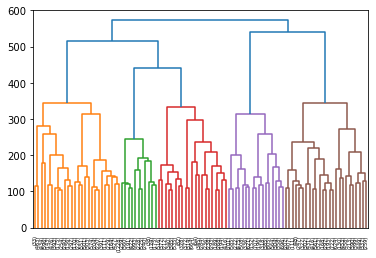

In [56]:
dendro_kwargs ={'truncate_mode':'lastp', 'p':100, 'leaf_rotation':90}
plot_dendrogram(ac_dendro, **dendro_kwargs)

## Trying AC 100

In [47]:
ac100 = AgglomerativeClustering(distance_threshold=100, n_clusters=None)
ac100 = ac100.fit(train)

In [48]:
len(np.unique(ac100.labels_))

106

In [49]:
clusters = show_labeled_titles(ac100.labels_, 20)

In [90]:
len(np.unique(ac100.labels_))

106

In [75]:
write_to_csv(ac100.labels_.reshape(-1,1), '../src/ac100labels.csv')

The average silhouette score is -0.09340661764144897


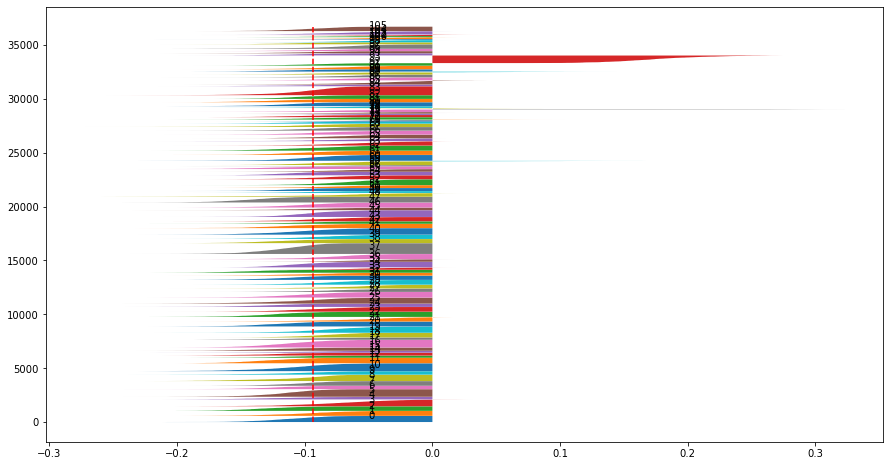

In [91]:
plot_silhouette(train, ac100.labels_)

## AC 150

In [22]:
ac125 = AgglomerativeClustering(distance_threshold=125, n_clusters=None)
ac125 = ac125.fit(train)

In [28]:
test = show_labeled_titles(ac125.labels_, 20)

In [78]:
next(test)


Topic 13:
Understanding Neural Networks
How to get 4x speedup and better generalization using the right batch size
Three ways of doing matrix multiplication in Excel — fastai part-2, lesson-8
Neural Network Optimization
Why Deep Learning Works — Step by Step Tutorial
Reproducible model training: deep dive
Back-Propagation simplified
Neural Networks, Demystified
The “mystery” behind back propagation
Backpropagation in a convolutional layer
The Math behind Artificial Neural Networks
Neural Network tutorial with Devanagari Characters using PyTorch
Nothing but NumPy: Understanding & Creating Binary Classification Neural Networks with Computational Graphs from Scratch
Steps to basic modern NN model from scratch
An Alternative To Batch Normalization
Neural Networks: Basics
Explained: Deep Learning in Tensorflow — Chapter 0
A 10-line proof of back propagation
Watching machine learning models fitting a curve!
Neural Architecture Search with NNI


Make a Scoring Algorithm to score strength of clusters! 
* average pairwise cosine distances


In [75]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
def score_clusters():
    # get cluster
    # calculate pairwise distances per cluster 
titles_[]

In [108]:
np.mean(pairwise_distances(model.docvecs.vectors_docs[topic_labels==2], metric='cosine'))

0.8339718